**Decoding the Dataset: Understanding the Fields**
In this workshop, we will delve into the intricacies of the dataset, gaining a comprehensive grasp of its key components. Here is an overview of the essential fields:<br>
**Work Year:** The year in which the salary was disbursed.<br>
**Experience Level:** The level of experience associated with the job during the respective year, categorized as:<br>
*   EN: Entry-level <br>
*  MI: Junior Mid-level  <br>
*SE: Intermediate Senior-level <br>
*EX: Expert Executive-level / Director <br>

**Employment Type:**  The nature of employment for the role, characterized as:<br>
* PT: Part-time <br>
* FT: Full-time <br>
* CT: Contract <br>
* FL: Freelance <br>

**Job Title:** The specific role held during the year. <br>
**Salary:** The total gross salary amount received.<br>
**Salary Currency:** The currency of the salary, denoted by an ISO 4217 currency code.<br>
**Salary in USD:** The equivalent salary in USD, calculated using the FX rate divided by the average USD rate for the corresponding year via fxdata.foorilla.com.<br>
**Employee Residence:** The primary country of residence of the employee during the work year, identified by an ISO 3166 country code. <br></br>
**Remote Ratio:** The extent of remote work conducted, with potential values encompassing:<br>
* 0: No remote work (less than 20%)<br>
* 50: Partially remote<br>
* 100: Fully remote (more than 80%)<br>

**Company Location:** The country where the employer's main office or contracting branch is situated, indicated by an ISO 3166 country code.<br>
**Company Size:** The average workforce size of the company during the year, categorized as:<br>
* S: Less than 50 employees (small) <br>
* M: 50 to 250 employees (medium)<br>
* L: More than 250 employees (large)<br>

# import libraries

In [ ]:
# libraries for Data Manipulation
import pandas as pd
import numpy as np

# libraies for Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import plotly.express as px
from matplotlib.colors import ListedColormap
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.colors as colors
import matplotlib.colors as mcolors

# libraries for Machine Learning
from sklearn.preprocessing import OrdinalEncoder
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import ttest_ind
from scipy.stats import f_oneway

import warnings
warnings.filterwarnings('ignore')

# load dataset

In [ ]:
O_df = pd.read_csv('/content/ds_salaries.csv')
O_df

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [ ]:
# copying the dataset
df = O_df.copy()
df

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [ ]:
# In this data, I have dropped some columns, named 'Unnamed: 0', 'salary' and 'salary_currency' and following is the resulting data:
#By setting axis=1, you are telling pandas to drop the specified columns from the DataFrame. If you were to set axis=0, it would mean dropping rows instead.
df.drop(['Unnamed: 0' , 'salary', 'salary_currency'], axis=1, inplace=True)

In [ ]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L


In [ ]:
# An outline of the dataset are follows

print(f"There are {df.shape[0]} instances.")
print(f"There are {df.shape[1]} dataframe columns/attributes/ features.")

num_attribs = ['work_year', 'salary_in_usd', 'remote_ratio']
cat_attribs = [df.columns[i] for i in range(len(df.columns)) if df.columns[i] not in num_attribs]

print(f"\nThere are {len(num_attribs)} numerical attributes: ")
for i in range(len(num_attribs)):
  print(f"{i+1}. {num_attribs[i]}")


print(f"\nThere are {len(cat_attribs)} categorical attributes: ")
for i in range(len(cat_attribs)):
  print(f"{i+1}. {cat_attribs[i]}")


There are 607 instances.
There are 9 dataframe columns/attributes/ features.

There are 3 numerical attributes: 
1. work_year
2. salary_in_usd
3. remote_ratio

There are 6 categorical attributes: 
1. experience_level
2. employment_type
3. job_title
4. employee_residence
5. company_location
6. company_size


In [ ]:
# Checking first 5 rows


,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L


In [ ]:
# checking last 5 rows
df.head(5)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L


In [ ]:
df.tail()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
602,2022,SE,FT,Data Engineer,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,US,100,US,M
606,2022,MI,FT,AI Scientist,200000,IN,100,US,L


In [ ]:
# Randomly checking 30 rows of the dataset
df.sample(30)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
473,2022,SE,FT,Data Scientist,140000,US,100,US,M
214,2021,EN,FT,Machine Learning Engineer,24823,DE,50,DE,M
366,2022,SE,FT,Data Engineer,136000,US,0,US,M
516,2022,SE,FT,Data Science Manager,152500,US,100,US,M
128,2021,EN,FT,Machine Learning Engineer,20000,IN,100,IN,S
527,2022,SE,FT,Data Analyst,135000,US,100,US,M
141,2021,SE,FT,Data Science Manager,240000,US,0,US,L
274,2021,SE,FT,Data Scientist,77684,FR,50,FR,M
271,2021,SE,FT,Computer Vision Engineer,18907,BR,0,BR,M
601,2022,EN,FT,Data Analyst,52000,CA,0,CA,M


In [ ]:
# checking shape of the dataset


(607, 9)

In [ ]:
# Checking columns
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_in_usd', 'employee_residence', 'remote_ratio',
       'company_location', 'company_size'],
      dtype='object')

In [ ]:
# count of columns
df.columns.value_counts().sum()

9

In [ ]:
# checking duplicate values
df.duplicated().sum()

42

#### > Review 1:  
- There is no overall duplicate values.
- There are 607 rows and 12 columns

### Data type of each columns

In [ ]:
# checking data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary_in_usd       607 non-null    int64 
 5   employee_residence  607 non-null    object
 6   remote_ratio        607 non-null    int64 
 7   company_location    607 non-null    object
 8   company_size        607 non-null    object
dtypes: int64(3), object(6)
memory usage: 42.8+ KB


#### > Review 2:
* In terms of data types, the attributes of this data set are mostly in the right format.


###  Consider the set of values of the categorical attributes
We will see how many distinguishing values each categorical attribute has using the `set()` method.

In [ ]:
set(df['work_year'].to_list())

{2020, 2021, 2022}

In [ ]:
set(df['experience_level'].to_list())

{'EN', 'EX', 'MI', 'SE'}

In [ ]:
set(df['employment_type'].to_list())

{'CT', 'FL', 'FT', 'PT'}

In [ ]:
set(df['remote_ratio'].to_list())

{0, 50, 100}

In [ ]:
set(df['company_size'].to_list())

{'L', 'M', 'S'}

In [ ]:
set(df['employee_residence'].to_list())

{'AE',
 'AR',
 'AT',
 'AU',
 'BE',
 'BG',
 'BO',
 'BR',
 'CA',
 'CH',
 'CL',
 'CN',
 'CO',
 'CZ',
 'DE',
 'DK',
 'DZ',
 'EE',
 'ES',
 'FR',
 'GB',
 'GR',
 'HK',
 'HN',
 'HR',
 'HU',
 'IE',
 'IN',
 'IQ',
 'IR',
 'IT',
 'JE',
 'JP',
 'KE',
 'LU',
 'MD',
 'MT',
 'MX',
 'MY',
 'NG',
 'NL',
 'NZ',
 'PH',
 'PK',
 'PL',
 'PR',
 'PT',
 'RO',
 'RS',
 'RU',
 'SG',
 'SI',
 'TN',
 'TR',
 'UA',
 'US',
 'VN'}

In [ ]:
set(df['company_location'].to_list())

{'AE',
 'AS',
 'AT',
 'AU',
 'BE',
 'BR',
 'CA',
 'CH',
 'CL',
 'CN',
 'CO',
 'CZ',
 'DE',
 'DK',
 'DZ',
 'EE',
 'ES',
 'FR',
 'GB',
 'GR',
 'HN',
 'HR',
 'HU',
 'IE',
 'IL',
 'IN',
 'IQ',
 'IR',
 'IT',
 'JP',
 'KE',
 'LU',
 'MD',
 'MT',
 'MX',
 'MY',
 'NG',
 'NL',
 'NZ',
 'PK',
 'PL',
 'PT',
 'RO',
 'RU',
 'SG',
 'SI',
 'TR',
 'UA',
 'US',
 'VN'}

In [ ]:
set(df['job_title'].to_list())

{'3D Computer Vision Researcher',
 'AI Scientist',
 'Analytics Engineer',
 'Applied Data Scientist',
 'Applied Machine Learning Scientist',
 'BI Data Analyst',
 'Big Data Architect',
 'Big Data Engineer',
 'Business Data Analyst',
 'Cloud Data Engineer',
 'Computer Vision Engineer',
 'Computer Vision Software Engineer',
 'Data Analyst',
 'Data Analytics Engineer',
 'Data Analytics Lead',
 'Data Analytics Manager',
 'Data Architect',
 'Data Engineer',
 'Data Engineering Manager',
 'Data Science Consultant',
 'Data Science Engineer',
 'Data Science Manager',
 'Data Scientist',
 'Data Specialist',
 'Director of Data Engineering',
 'Director of Data Science',
 'ETL Developer',
 'Finance Data Analyst',
 'Financial Data Analyst',
 'Head of Data',
 'Head of Data Science',
 'Head of Machine Learning',
 'Lead Data Analyst',
 'Lead Data Engineer',
 'Lead Data Scientist',
 'Lead Machine Learning Engineer',
 'ML Engineer',
 'Machine Learning Developer',
 'Machine Learning Engineer',
 'Machine Lear

#### > Review 3:
- Displaying value with the default abbreviations in some of the following features can be difficult or confusing for viewers:
    - employment_type
    - employee_residence
    - remote_ratio
    - company_location
    - company_size


#### 📌 Solution:
- Replace abbreviated attribute values with full words for a clearer understanding of the data and for clearer visualizations.

In [ ]:
# experience_level
# EN - Entry-level / Junior
# MI - Mid-level / Intermediate
# SE - Senior-level / Expert
# EX -Executive-level / Director
df['experience_level'] = df['experience_level'].replace(['EN', 'MI', 'SE', 'EX'], ['Junior', 'Middle', 'Senior', 'Executive'])


# employment_type
df['employment_type'] = df['employment_type'].replace(['PT', 'FT', 'CT', 'FL'], ['Part Time', 'Full Time', 'Contract', 'Freelance'])

# remote_ratio
df['remote_ratio'] = df['remote_ratio'].replace([100, 50, 0],['Fully Remote', 'Partially Remote', 'On Site'])
df['remote_ratio'] = df['remote_ratio'].astype(object)

# company_size
df['company_size'] =df['company_size'].replace(['L', 'M', 'S'], ['Large', 'Medium', 'Small'])

#Employee Residence & Company location
##ISO code

ISO3166 = {
	'AD': 'Andorra',
	'AE': 'United Arab Emirates',
	'AF': 'Afghanistan',
	'AG': 'Antigua & Barbuda',
	'AI': 'Anguilla',
	'AL': 'Albania',
	'AM': 'Armenia',
	'AN': 'Netherlands Antilles',
	'AO': 'Angola',
	'AQ': 'Antarctica',
	'AR': 'Argentina',
	'AS': 'American Samoa',
	'AT': 'Austria',
	'AU': 'Australia',
	'AW': 'Aruba',
	'AZ': 'Azerbaijan',
	'BA': 'Bosnia and Herzegovina',
	'BB': 'Barbados',
	'BD': 'Bangladesh',
	'BE': 'Belgium',
	'BF': 'Burkina Faso',
	'BG': 'Bulgaria',
	'BH': 'Bahrain',
	'BI': 'Burundi',
	'BJ': 'Benin',
	'BM': 'Bermuda',
	'BN': 'Brunei Darussalam',
	'BO': 'Bolivia',
	'BR': 'Brazil',
	'BS': 'Bahama',
	'BT': 'Bhutan',
	'BU': 'Burma (no longer exists)',
	'BV': 'Bouvet Island',
	'BW': 'Botswana',
	'BY': 'Belarus',
	'BZ': 'Belize',
	'CA': 'Canada',
	'CC': 'Cocos (Keeling) Islands',
	'CF': 'Central African Republic',
	'CG': 'Congo',
	'CH': 'Switzerland',
	'CI': 'Côte D\'ivoire (Ivory Coast)',
	'CK': 'Cook Iislands',
	'CL': 'Chile',
	'CM': 'Cameroon',
	'CN': 'China',
	'CO': 'Colombia',
	'CR': 'Costa Rica',
	'CS': 'Czechoslovakia (no longer exists)',
	'CU': 'Cuba',
	'CV': 'Cape Verde',
	'CX': 'Christmas Island',
	'CY': 'Cyprus',
	'CZ': 'Czech Republic',
	'DD': 'German Democratic Republic (no longer exists)',
	'DE': 'Germany',
	'DJ': 'Djibouti',
	'DK': 'Denmark',
	'DM': 'Dominica',
	'DO': 'Dominican Republic',
	'DZ': 'Algeria',
	'EC': 'Ecuador',
	'EE': 'Estonia',
	'EG': 'Egypt',
	'EH': 'Western Sahara',
	'ER': 'Eritrea',
	'ES': 'Spain',
	'ET': 'Ethiopia',
	'FI': 'Finland',
	'FJ': 'Fiji',
	'FK': 'Falkland Islands (Malvinas)',
	'FM': 'Micronesia',
	'FO': 'Faroe Islands',
	'FR': 'France',
	'FX': 'France, Metropolitan',
	'GA': 'Gabon',
	'GB': 'United Kingdom (Great Britain)',
	'GD': 'Grenada',
	'GE': 'Georgia',
	'GF': 'French Guiana',
	'GH': 'Ghana',
	'GI': 'Gibraltar',
	'GL': 'Greenland',
	'GM': 'Gambia',
	'GN': 'Guinea',
	'GP': 'Guadeloupe',
	'GQ': 'Equatorial Guinea',
	'GR': 'Greece',
	'GS': 'South Georgia and the South Sandwich Islands',
	'GT': 'Guatemala',
	'GU': 'Guam',
	'GW': 'Guinea-Bissau',
	'GY': 'Guyana',
	'HK': 'Hong Kong',
	'HM': 'Heard & McDonald Islands',
	'HN': 'Honduras',
	'HR': 'Croatia',
	'HT': 'Haiti',
	'HU': 'Hungary',
	'ID': 'Indonesia',
	'IE': 'Ireland',
	'IL': 'Israel',
	'IN': 'India',
	'IO': 'British Indian Ocean Territory',
	'IQ': 'Iraq',
	'IR': 'Islamic Republic of Iran',
	'IS': 'Iceland',
	'IT': 'Italy',
	'JM': 'Jamaica',
	'JO': 'Jordan',
	'JP': 'Japan',
	'KE': 'Kenya',
	'KG': 'Kyrgyzstan',
	'KH': 'Cambodia',
	'KI': 'Kiribati',
	'KM': 'Comoros',
	'KN': 'St. Kitts and Nevis',
	'KP': 'Korea, Democratic People\'s Republic of',
	'KR': 'Korea, Republic of',
	'KW': 'Kuwait',
	'KY': 'Cayman Islands',
	'KZ': 'Kazakhstan',
	'LA': 'Lao People\'s Democratic Republic',
	'LB': 'Lebanon',
	'LC': 'Saint Lucia',
	'LI': 'Liechtenstein',
	'LK': 'Sri Lanka',
	'LR': 'Liberia',
	'LS': 'Lesotho',
	'LT': 'Lithuania',
	'LU': 'Luxembourg',
	'LV': 'Latvia',
	'LY': 'Libyan Arab Jamahiriya',
	'MA': 'Morocco',
	'MC': 'Monaco',
	'MD': 'Moldova, Republic of',
	'MG': 'Madagascar',
	'MH': 'Marshall Islands',
	'ML': 'Mali',
	'MN': 'Mongolia',
	'MM': 'Myanmar',
	'MO': 'Macau',
	'MP': 'Northern Mariana Islands',
	'MQ': 'Martinique',
	'MR': 'Mauritania',
	'MS': 'Monserrat',
	'MT': 'Malta',
	'MU': 'Mauritius',
	'MV': 'Maldives',
	'MW': 'Malawi',
	'MX': 'Mexico',
	'MY': 'Malaysia',
	'MZ': 'Mozambique',
	'NA': 'Namibia',
	'NC': 'New Caledonia',
	'NE': 'Niger',
	'NF': 'Norfolk Island',
	'NG': 'Nigeria',
	'NI': 'Nicaragua',
	'NL': 'Netherlands',
	'NO': 'Norway',
	'NP': 'Nepal',
	'NR': 'Nauru',
	'NT': 'Neutral Zone (no longer exists)',
	'NU': 'Niue',
	'NZ': 'New Zealand',
	'OM': 'Oman',
	'PA': 'Panama',
	'PE': 'Peru',
	'PF': 'French Polynesia',
	'PG': 'Papua New Guinea',
	'PH': 'Philippines',
	'PK': 'Pakistan',
	'PL': 'Poland',
	'PM': 'St. Pierre & Miquelon',
	'PN': 'Pitcairn',
	'PR': 'Puerto Rico',
	'PT': 'Portugal',
	'PW': 'Palau',
	'PY': 'Paraguay',
	'QA': 'Qatar',
	'RE': 'Réunion',
	'RO': 'Romania',
	'RU': 'Russian Federation',
	'RW': 'Rwanda',
	'SA': 'Saudi Arabia',
	'SB': 'Solomon Islands',
	'SC': 'Seychelles',
	'SD': 'Sudan',
	'SE': 'Sweden',
	'SG': 'Singapore',
	'SH': 'St. Helena',
	'SI': 'Slovenia',
	'SJ': 'Svalbard & Jan Mayen Islands',
	'SK': 'Slovakia',
	'SL': 'Sierra Leone',
	'SM': 'San Marino',
	'SN': 'Senegal',
	'SO': 'Somalia',
	'SR': 'Suriname',
	'ST': 'Sao Tome & Principe',
	'SU': 'Union of Soviet Socialist Republics (no longer exists)',
	'SV': 'El Salvador',
	'SY': 'Syrian Arab Republic',
	'SZ': 'Swaziland',
	'TC': 'Turks & Caicos Islands',
	'TD': 'Chad',
	'TF': 'French Southern Territories',
	'TG': 'Togo',
	'TH': 'Thailand',
	'TJ': 'Tajikistan',
	'TK': 'Tokelau',
	'TM': 'Turkmenistan',
	'TN': 'Tunisia',
	'TO': 'Tonga',
	'TP': 'East Timor',
	'TR': 'Turkey',
	'TT': 'Trinidad & Tobago',
	'TV': 'Tuvalu',
	'TW': 'Taiwan, Province of China',
	'TZ': 'Tanzania, United Republic of',
	'UA': 'Ukraine',
	'UG': 'Uganda',
	'UM': 'United States Minor Outlying Islands',
	'US': 'United States of America',
	'UY': 'Uruguay',
	'UZ': 'Uzbekistan',
	'VA': 'Vatican City State (Holy See)',
	'VC': 'St. Vincent & the Grenadines',
	'VE': 'Venezuela',
	'VG': 'British Virgin Islands',
	'VI': 'United States Virgin Islands',
	'VN': 'Viet Nam',
	'VU': 'Vanuatu',
	'WF': 'Wallis & Futuna Islands',
	'WS': 'Samoa',
	'YD': 'Democratic Yemen (no longer exists)',
	'YE': 'Yemen',
	'YT': 'Mayotte',
	'YU': 'Yugoslavia',
	'ZA': 'South Africa',
	'ZM': 'Zambia',
	'ZR': 'Zaire',
	'ZW': 'Zimbabwe',
	'ZZ': 'Unknown or unspecified country',
}
df['employee_residence'] = df['employee_residence'].map(ISO3166)
df['company_location'] = df['company_location'].map(ISO3166)

#### 📌 Review 2:
- There are many job categories listed here (65 categories).
- There are many job titles that can be grouped into one field:
    - For example: Financial Data Analyst, Product Data Analyst, Business Data Analyst, ... can be collectively called Data Analyst.
    - For example: Cloud Data Architect, Principal Data Architect, Big Data Architect',... can be collectively called Data Architect.
- Some jobs even appear in both categories of names (this can be considered a duplication):
    - For example: Machine Learning Engineer and ML Engineer are both understood as Machine Learning Engineer.
    - For example: Financial Data Analyst and Finance Data Analyst.

#### 💡 Solution:
- For the purposes of data discovery and analysis, we will divide the job titles into the appropriate generalization buckets. Here the group has classified and divided into the following main groups:

    - Data Scientist
    - Data Engineer
    - Data Analyst
    - Data Architect
    - Machine Learning Engineer
    - Machine Learning Scientist
    - Computer Vision Engineer
    - NLP Engineer
    - Research Scientist
    - AI Scientist
    - Applied Scientist

#### 🛠 Perform preprocessing:

In [ ]:
# mapping the new classification type
employment_classification = {'Data Scientist':'Data Scientist',
                             'Principal Data Scientist':'Data Scientist',
                             'Applied Data Scientist':'Data Scientist',
                             'Data Science Manager':'Data Scientist',
                             'Head of Data Science':'Data Scientist',
                             'Director of Data Science':'Data Scientist',
                             'Staff Data Scientist':'Data Scientist',
                             'Data Science Consultant':'Data Scientist',
                             'Data Science Engineer':'Data Scientist',
                             'Head of Data':'Data Scientist',
                             'Lead Data Scientist':'Data Scientist',
                             'Data Scientist Lead':'Data Scientist',
                             'Data Science Lead':'Data Scientist',
                             'Product Data Scientist':'Data Scientist',
                             'Data Specialist':'Data Scientist',

                             'Big Data Engineer':'Data Engineer',
                             'Data Engineer':'Data Engineer',
                             'Principal Data Engineer':'Data Engineer',
                             'Data Operations Engineer':'Data Engineer',
                             'Lead Data Engineer':'Data Engineer',
                             'Director of Data Engineering':'Data Engineer',
                             'Research Engineer':'Data Engineer',
                             'Data Engineering Manager':'Data Engineer',
                             'Cloud Data Engineer':'Data Engineer',
                             'Data Science Tech Lead':'Data Engineer',
                             'Data Manager':'Data Engineer',
                             'ETL Developer':'Data Engineer',

                             'Product Data Analyst':'Data Analyst',
                             'Data Analyst':'Data Analyst',
                             'Business Data Analyst':'Data Analyst',
                             'Data Science Consultant':'Data Analyst',
                             'BI Data Analyst':'Data Analyst',
                             'BI Analyst':'Data Analyst',
                             'Lead Data Analyst':'Data Analyst',
                             'Data Analytics Engineer':'Data Analyst',
                             'Marketing Data Analyst':'Data Analyst',
                             'Financial Data Analyst':'Data Analyst',
                             'Finance Data Analyst':'Data Analyst',
                             'Principal Data Analyst':'Data Analyst',
                             'Data Analytics Manager':'Data Analyst',
                             'Data Analytics Lead':'Data Analyst',
                             'Analytics Engineer':'Data Analyst',
                             'Data Operations Analyst':'Data Analyst',
                             'Data Analytics Consultant':'Data Analyst',
                             'Power BI Developer':'Data Analyst',

                             'Machine Learning Scientist':'Machine Learning Scientist',
                             'Applied Machine Learning Scientist':'Machine Learning Scientist',
                             'Machine Learning Research Engineer':'Machine Learning Scientist',
                             'Head of Machine Learning':'Machine Learning Scientist',
                             'Machine Learning Manager':'Machine Learning Scientist',

                             'Machine Learning Infrastructure Engineer':'Machine Learning Engineer',
                             'Machine Learning Engineer':'Machine Learning Engineer',
                             'ML Engineer':'Machine Learning Engineer',
                             'Lead Machine Learning Engineer':'Machine Learning Engineer',
                             'Machine Learning Developer':'Machine Learning Engineer',

                             'Data Architect':'Data Architect',
                             'Cloud Data Architect':'Data Architect',
                             'Principal Data Architect':'Data Architect',
                             'Big Data Architect':'Data Architect',

                             'Computer Vision Engineer':'Computer Vision Engineer',
                             'Computer Vision Software Engineer':'Computer Vision Engineer',
                             '3D Computer Vision Researcher':'Computer Vision Engineer',

                             'NLP Engineer':'NLP Engineer',
                             'AI Scientist':'AI Scientist',
                             'Research Scientist':'Research Scientist',
                             'Applied Scientist':'Applied Scientist',
                            }
df['job_title'] = df['job_title'].map(employment_classification)

In [ ]:
# checking missing values of Numeric columns
df[['work_year','salary_in_usd']].isna().any()


work_year        False
salary_in_usd    False
dtype: bool

#### Consider the value distribution of numeric data columns


In [ ]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary_in_usd          int64
employee_residence    object
remote_ratio          object
company_location      object
company_size          object
dtype: object

👉 We see that after the above preprocessing steps, there are 3 columns of numeric data: work_year, salary, salary_in_usd.

👉 Perform statistics on these 3 columns and see the specific values as follows:

- Percentage (from 0 to 100) of missing values.
- Min value (min).
- The value of lower quartile (25th percentile) (lower_quartile).
- Median value (50th percentile) (median).
- Value upper quartile (75th percentile) (upper_quartile).
- Max value (max).

In [ ]:
df.describe()

,work_year,salary_in_usd
count,607.000000,607.000000
mean,2021.405272,112297.869852
std,0.692133,70957.259411
min,2020.000000,2859.000000
25%,2021.000000,62726.000000
50%,2022.000000,101570.000000
75%,2022.000000,150000.000000
max,2022.000000,600000.000000


In [ ]:
# After reshaping some columns, An outline of the dataset are follows

print(f'There are {df.shape[0]} rows or values.')
print(f'There are {df.shape[1]} columns or features.')

# separate Numeric and Categorical columns
cat = df.select_dtypes(include = ['object'])
num = df.select_dtypes(exclude = ['object'])

num_attribs = ['work_year', 'salary_in_usd', 'remote_ratio']
cat_attribs = [df.columns[i] for i in range(len(df.columns)) if df.columns[i] not in num_attribs]

print('*************************************')

count_cat = cat.any().sum()
count_num = num.any().sum()

print(f'There are {count_cat} Categorical Columns')
print('--------------------------------------')
for i in range(len(cat.columns)):
    print(f'{i+1}. {cat.columns[i]}')
print('\n***************************************\n')

print(f'There are {count_num} Numerical Columns')
print('--------------------------------------')
for i in range(len(num.columns)):
    print(f'{i+1}. {num.columns[i]}')


There are 607 rows or values.
There are 9 columns or features.
*************************************
There are 7 Categorical Columns
--------------------------------------
1. experience_level
2. employment_type
3. job_title
4. employee_residence
5. remote_ratio
6. company_location
7. company_size

***************************************

There are 2 Numerical Columns
--------------------------------------
1. work_year
2. salary_in_usd


#### After Preprocessing the columns looks like below:



-----------work_year----------
2022    318
2021    217
2020     72
Name: work_year, dtype: int64


-----------experience_level----------
Senior       280
Middle       213
Junior        88
Executive     26
Name: experience_level, dtype: int64


-----------employment_type----------
Full Time    588
Part Time     10
Contract       5
Freelance      4
Name: employment_type, dtype: int64


-----------job_title----------
Data Scientist                191
Data Engineer                 160
Data Analyst                  142
Machine Learning Engineer      54
Research Scientist             16
Machine Learning Scientist     14
Data Architect                 12
Computer Vision Engineer       10
AI Scientist                    7
NLP Engineer                    1
Name: job_title, dtype: int64


-----------salary_in_usd----------
100000    15
120000    12
150000    12
200000    10
135000     9
          ..
74000      1
61896      1
26005      1
22611      1
129000     1
Name: salary_in_usd, Length: 3

## Univariate Analysis
- Numerical Attributes

In [ ]:
df['experience_level'].unique()

array(['Middle', 'Senior', 'Junior', 'Executive'], dtype=object)

# 1. Distribution of salary

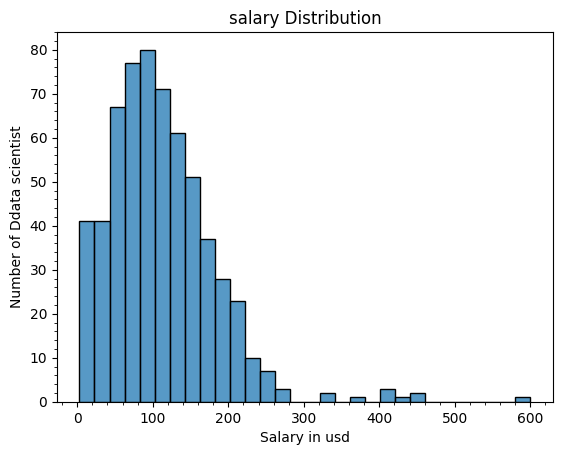

In [ ]:
sns.histplot(df['salary_in_usd']/1000,bins=30)
plt.title('salary Distribution')
plt.xlabel('Salary in usd')
plt.ylabel('Number of Ddata scientist')
plt.minorticks_on()

observation:  Salary distribution is Right skwed

In [ ]:


# px.histogram(df, x = 'salary_in_usd' , marginal = 'rug' , template = 'ggplot2' , labels = {'salary_in_usd' : 'salary'} , title = '<b> Salary Distribution')

# 2. experience_lavel

## There are 4 categories in this attribute :

- EN - Entry-level / Junior
- MI - Mid-level / Intermediate
- SE - Senior-level / Expert
- EX -Executive-level / Director

In [ ]:
counts = df['experience_level'].value_counts()
counts

Senior       280
Middle       213
Junior        88
Executive     26
Name: experience_level, dtype: int64

<Axes: ylabel='experience_level'>

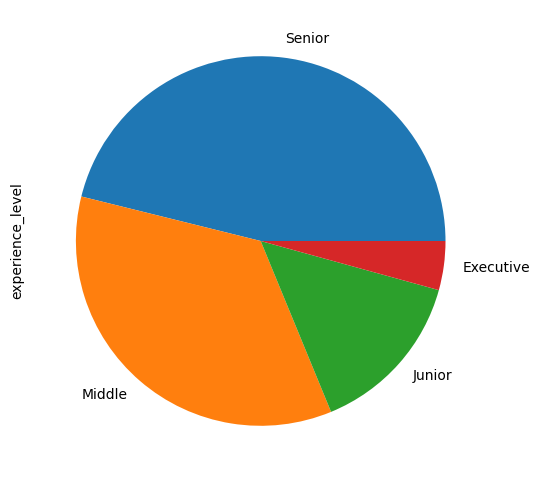

In [ ]:
 df['experience_level'].value_counts().plot(kind='pie', figsize=(12,6))

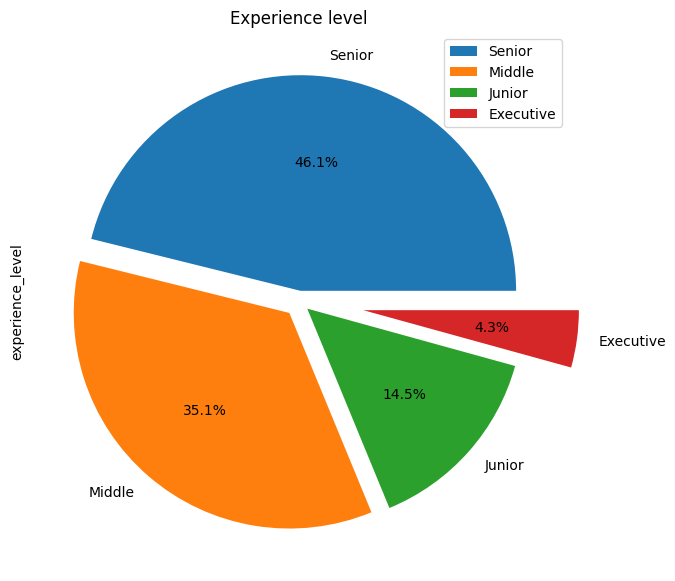

In [ ]:
order = ['Junior', 'Middle', 'Senior', 'Executive']
plt.figure(figsize=(10,7))
counts.plot(kind='pie', autopct='%1.1f%%', explode=[0.05, 0.07, 0.05, 0.3])
plt.title('Experience level')
plt.legend(counts.index, loc='upper right', fontsize=10)

<Axes: >

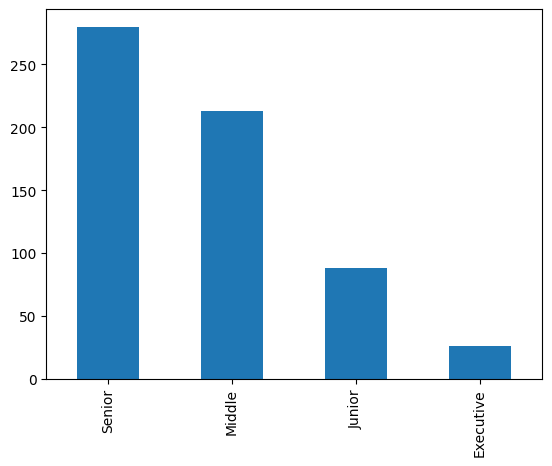

In [ ]:
counts.plot(kind='bar')

Text(0.5, 1.0, 'Experience Level')

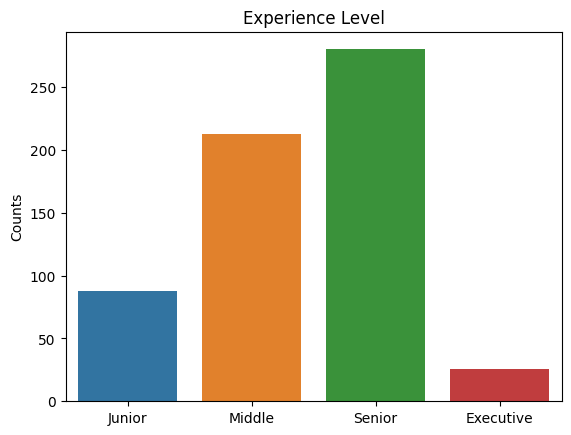

In [ ]:
order = ['Junior', 'Middle', 'Senior', 'Executive']
counts.sort_index(inplace=True)
sns.barplot(x=counts.index, y=counts, order=order)
plt.ylabel('Counts')
plt.title('Experience Level')

#### Observation:
- We can see from the above pie chart that senior level jobs mostly requires experience.

# 3. employment_type

In [ ]:
df['employment_type'].unique()

array(['Full Time', 'Contract', 'Part Time', 'Freelance'], dtype=object)

In [ ]:
counts = df['employment_type'].value_counts()
counts

Full Time    588
Part Time     10
Contract       5
Freelance      4
Name: employment_type, dtype: int64

Text(0.5, 1.0, 'Employment TYpe')

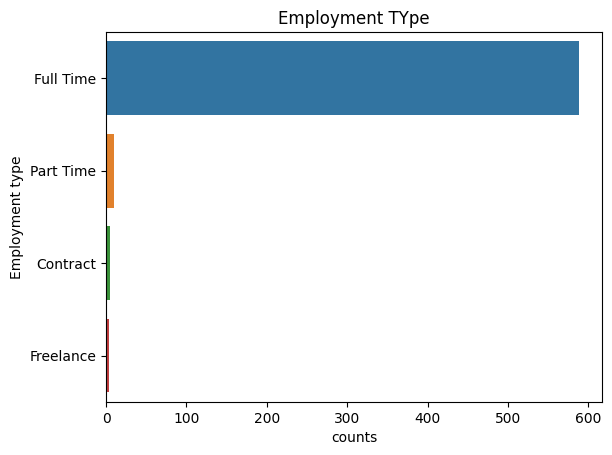

In [ ]:
# bar chart
sns.barplot(x=counts.values, y=counts.index)
plt.xlabel('counts')
plt.ylabel('Employment type')
plt.title('Employment TYpe')

<Axes: ylabel='employment_type'>

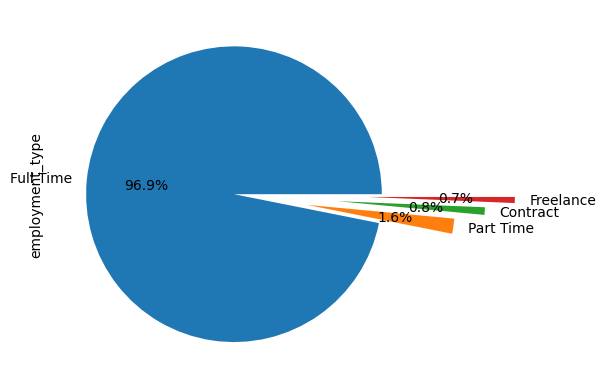

In [ ]:
# pie chart
counts.plot(kind='pie', autopct='%0.1f%%', explode=[0,0.5,0.7,0.9])

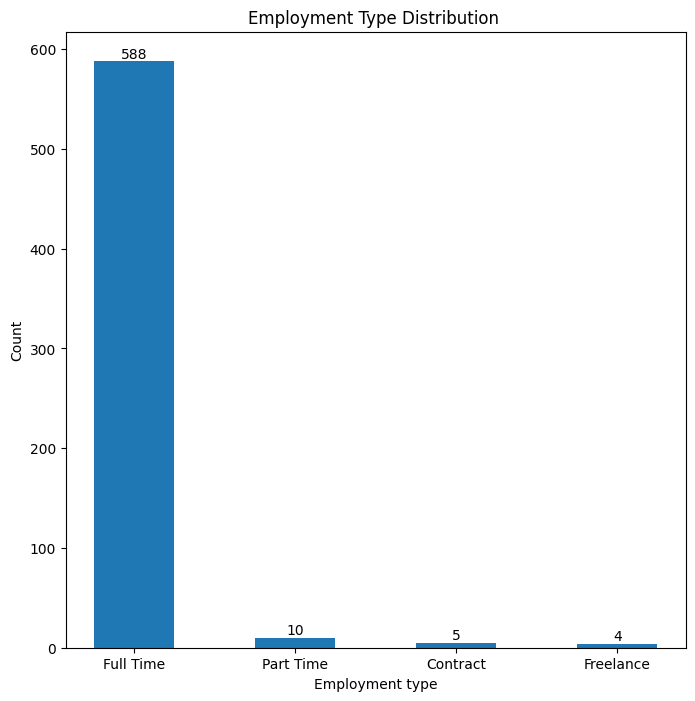

In [ ]:
# bar chart with count
labels = df['employment_type'].value_counts().index.to_list()
values = df['employment_type'].value_counts().to_list()
# Plot Bar Chart
plt.figure(figsize=(8,8))
z = plt.bar(x=labels, height=values, width=0.5)
plt.bar_label(z, labels=values, label_type='edge')
plt.title('Employment Type Distribution ')
plt.xlabel('Employment type')
plt.ylabel('Count')
plt.show()

# Observation:
- We can see that 96.9% of the jobs are Full-time jobs.
- Contract and freelancing jobs are not given that much importance in Data Science.
- Part Time jobs are also rare.

# Bivariate Analysis

## Work Year and Remote Ratio

In [ ]:
remote_by_year = df.groupby(['work_year', 'remote_ratio']).agg({'remote_ratio': pd.Series.count}).rename({'remote_ratio': 'count'}, axis=1)
remote_by_year = remote_by_year.reset_index()
remote_by_year

,work_year,remote_ratio,count
0,2020,Fully Remote,36
1,2020,On Site,15
2,2020,Partially Remote,21
3,2021,Fully Remote,117
4,2021,On Site,34
5,2021,Partially Remote,66
6,2022,Fully Remote,228
7,2022,On Site,78
8,2022,Partially Remote,12


#### objervation:
- Fully Remote ratio Increased each year.
- Partially or Hybrid ratio Increased in 2021 year but decreased 2020.
- On Site ratio decreased each year.

#### Relationship between salary and work year

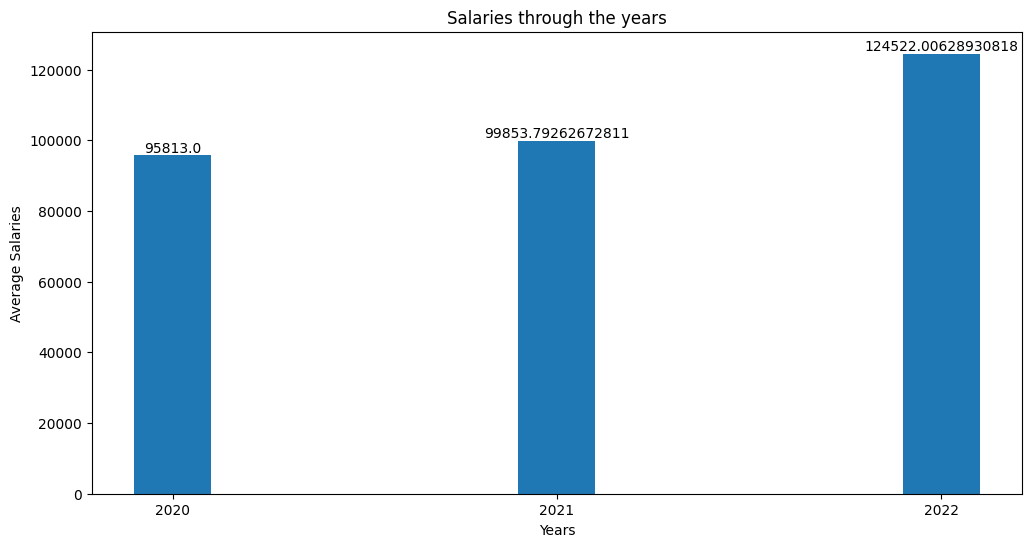

In [ ]:
years_avg = [df[df['work_year'] == 2020].salary_in_usd.mean(),
            df[df['work_year'] == 2021].salary_in_usd.mean(),
            df[df['work_year'] == 2022].salary_in_usd.mean()]
values = years_avg
labels = ['2020','2021','2022']

plt.figure(figsize=(12,6))
z = plt.bar(labels, values, width=0.2)
plt.bar_label(z, labels=values)
plt.title('Salaries through the years')
plt.xlabel('Years')
plt.ylabel('Average Salaries')
plt.show()



In [ ]:
px.box(df,x='work_year',y='salary_in_usd',color='work_year',labels={'work_year':'year','salary_in_usd':'salary in usd'},
          template='seaborn',title='<b>Data Science Salaries by year')

#### observation:
- Average salaries increased each year

#### Relationship between Salary and company size

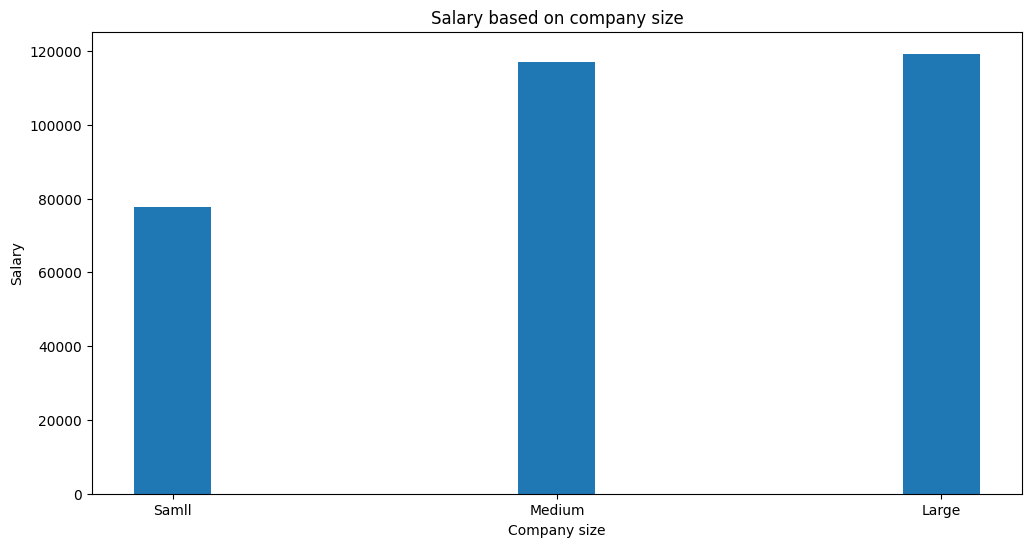

In [ ]:
years_avg = [df[df['company_size'] == 'Small'].salary_in_usd.mean(),
            df[df['company_size'] == 'Medium'].salary_in_usd.mean(),
            df[df['company_size'] == 'Large'].salary_in_usd.mean()]
plt.figure(figsize=(12,6))
plt.title('Salary based on company size')
plt.bar(x=['Samll','Medium','Large'], height=years_avg, width=0.2)
plt.xlabel('Company size')
plt.ylabel('Salary')
plt.show()

#### observation:
- comparetively Larger comapany pays more salary.